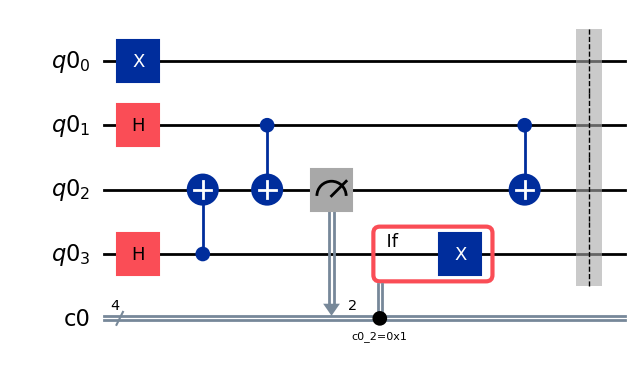

In [1]:
from qiskit import *
qubits = QuantumRegister(4)
clbits = ClassicalRegister(4)
circuit = QuantumCircuit(qubits, clbits)
 
q0, q1, q2, q3 = qubits
c0, c1, c2, c3 = clbits

circuit.x(q0)
circuit.h([q1, q3])
circuit.cx(q3,q2)
circuit.cx(q1,q2)
circuit.measure(q2, c2)
with circuit.if_test((c2, 1)):
        circuit.x(q3)

circuit.cx(q1,q2)
circuit.barrier()
circuit.draw('mpl')

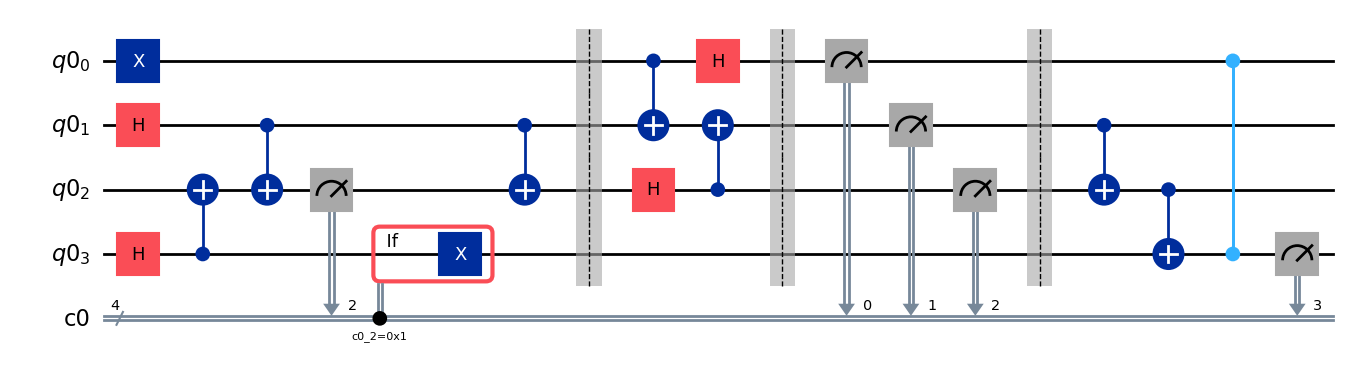

In [2]:
circuit.cx(q0,q1)
circuit.h([q0, q2])
circuit.cx(q2,q1)
circuit.barrier()
circuit.measure([q0,q1,q2],[c0,c1,c2])
circuit.barrier()
circuit.cx(q1,q2)
circuit.cx(q2,q3)
circuit.cz(q0,q3)
circuit.measure(q3,c3)
circuit.draw('mpl')


In [3]:

"""
with circuit.switch(clbits) as case:
    with case(0b000, 0b111):
        pass
    with case(0b010, 0b001):
        circuit.x(q3)
    with case(0b100, 0b011):
        circuit.z(q3)
    with case(0b110, 0b101):
        circuit.x(q3)
        circuit.z(q3)
circuit.measure(q3,c3)
circuit.draw('mpl')
"""

"\nwith circuit.switch(clbits) as case:\n    with case(0b000, 0b111):\n        pass\n    with case(0b010, 0b001):\n        circuit.x(q3)\n    with case(0b100, 0b011):\n        circuit.z(q3)\n    with case(0b110, 0b101):\n        circuit.x(q3)\n        circuit.z(q3)\ncircuit.measure(q3,c3)\ncircuit.draw('mpl')\n"

In [4]:
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
)
import qiskit
from qiskit_aer import AerSimulator
# Construct an ideal simulator
aersim = AerSimulator()
"""
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
built = transpile(circuit, backend)
built.draw(output="mpl", style='iqp', idle_wires=False, cregbundle=False)
job = backend.run(built, dynamic=True)
hardware_counts = job.result().get_counts()
hardware_counts
"""

# Construct a simulator using a noise model
# from a real backend.
provider = QiskitRuntimeService()
backend = provider.get_backend("ibm_kyoto")
aersim_backend = AerSimulator.from_backend(backend)


In [5]:


# Perform noisy simulation
result_noise = aersim_backend.run(circuit).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)

Counts(noise): {'0111': 17, '0000': 14, '0011': 16, '0001': 23, '0010': 11, '1111': 109, '1101': 115, '1011': 118, '1001': 105, '1100': 100, '0100': 15, '0110': 20, '1010': 127, '0101': 18, '1000': 119, '1110': 97}


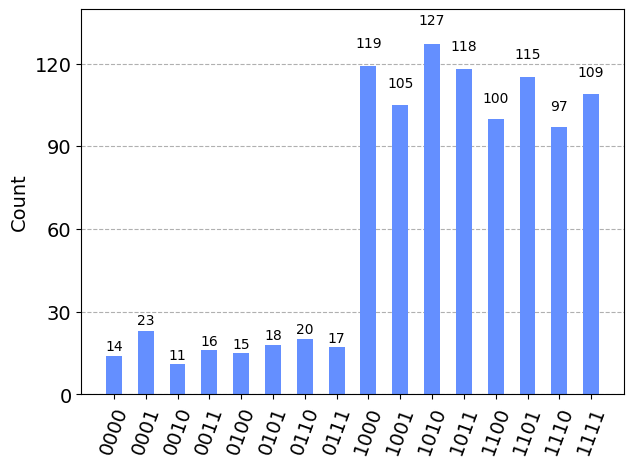

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_noise)